<a href="https://colab.research.google.com/github/Ferarenas14/Ferarenas14/blob/main/Polinomio_Newton_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polinomio Interpolante de Newton Sympy

Polinomio de interpolación de Newton:
1.0*x**2


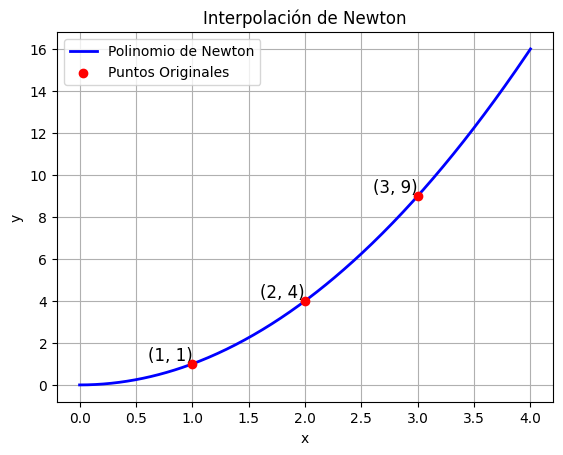

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular las diferencias divididas de Newton
def diferencias_divididas(x_datos, y_datos):

    n = len(x_datos)
    #  tabla para almacenar las diferencias divididas
    tabla = np.zeros((n, n))

    # La primera columna son los valores y_datos
    tabla[:, 0] = y_datos

    # Llenar el resto de la tabla de diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            tabla[i, j] = (tabla[i + 1, j - 1] - tabla[i, j - 1]) / (x_datos[i + j] - x_datos[i])

    # Retornar la primera fila de la tabla de diferencias divididas
    return tabla[0]

# Función para calcular el polinomio de interpolación de Newton
def polinomio_newton(x_datos, y_datos):
    x = sp.symbols('x')

    # Obtener los coeficientes de las diferencias divididas
    coeficientes = diferencias_divididas(x_datos, y_datos)

    # Inicializar el polinomio
    polinomio = coeficientes[0]

    # Construir el polinomio de Newton
    for i in range(1, len(coeficientes)):
        termino = coeficientes[i]
        for j in range(i):
            termino *= (x - x_datos[j])
        polinomio += termino

    return sp.simplify(polinomio)

# Función para graficar el polinomio de Newton y los puntos originales
def graficar(x_datos, y_datos, polinomio):
    # Crear un rango de valores de x para la gráfica del polinomio
    x_vals = np.linspace(min(x_datos) - 1, max(x_datos) + 1, 400)
    # Evaluar el polinomio de Newton para los valores de x
    y_vals = np.array([float(polinomio.evalf(subs={sp.symbols('x'): val})) for val in x_vals])

    # Graficar el polinomio de Newton
    plt.plot(x_vals, y_vals, label="Polinomio de Newton", color="blue", linewidth=2)

    # Graficar los puntos originales
    plt.scatter(x_datos, y_datos, color="red", zorder=5, label="Puntos Originales")

    # Etiquetas de los puntos
    for i in range(len(x_datos)):
        plt.text(x_datos[i], y_datos[i], f"({x_datos[i]}, {y_datos[i]})", fontsize=12, verticalalignment='bottom', horizontalalignment='right')

    #  gráfica
    plt.title("Interpolación de Newton")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejemplo
# Ingresar los puntos de la tabla de datos
x_datos = [1, 2, 3]  # valores de x
y_datos = [1, 4, 9]  # valores de y

# Calcular el polinomio de interpolación de Newton
polinomio = polinomio_newton(x_datos, y_datos)

# Mostrar el polinomio
print("Polinomio de interpolación de Newton:")
print(polinomio)

# Graficar el polinomio junto con los puntos originales
graficar(x_datos, y_datos, polinomio)